In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             precision_score,

)

In [2]:
df = pd.read_csv("../NLP_Pretraitemet/code/dataset_uvbf_pretraite.csv")
df.head()

,comments,textes_nettoyes,textes_pretraites
0,Les cours sont intéressants mais parfois diffi...,les cours sont interessants mais parfois diffi...,cour interess parfois difficil a suivr a caus ...
1,Oui je pense que il ya des failles ! La connex...,oui je pense que il ya des failles ! la connex...,oui pens ya faill connexion stabl plus qualit ...
2,"L'université virtuelle du Burkina Faso, est un...","l'universite virtuelle du burkina faso, est un...",virtuel burkin faso universit qualit car perme...
3,Rien à dire! J'adore le UV-BF,rien a dire! j'adore le uv-bf,rien a dir
4,Formidable ! J'apprécie beaucoup ! Il n'y a p...,formidable ! j'apprecie beaucoup ! il n'y a pa...,formid beaucoup a difficult tant tel


In [5]:
# Annotations des sentiments
# Dictionnaires de mots pour l'analyse de sentiment
mots_positifs = [
    'bon', 'bien', 'excellent', 'super', 'génial', 'parfait', 'satisfait',
    'content', 'heureux', 'merci', 'félicitation', 'apprécier', 'aimer',
    'qualité', 'intéressant', 'utile', 'efficace', 'professionnel',
    'meilleur', 'top', 'cool', 'formidable', 'magnifique', 'réussi'
]

mots_negatifs = [
    'mauvais', 'nul', 'pas', 'non', 'jamais', 'problème', 'difficulté',
    'difficile', 'compliqué', 'lent', 'cher', 'déçu', 'frustrant',
    'bug', 'erreur', 'panne', 'coupure', 'connexion', 'instable',
    'attendre', 'retard', 'absent', 'manque', 'incomplet', 'mauvais'
]

# Annoter chaque texte
sentiments = []

for texte in df['textes_nettoyes']:
    texte_lower = str(texte).lower()
    
    # Compter les mots positifs et négatifs
    score_positif = sum(1 for mot in mots_positifs if mot in texte_lower)
    score_negatif = sum(1 for mot in mots_negatifs if mot in texte_lower)
    
    # Déterminer le sentiment
    if score_positif > score_negatif:
        sentiments.append('positif')
    elif score_negatif > score_positif:
        sentiments.append('negatif')
    else:
        sentiments.append('neutre')

df['sentiment'] = sentiments

print(f"    Sentiments annotés")
print(f"\n   Distribution des sentiments:")
print(df['sentiment'].value_counts())

nb_positifs = (df['sentiment'] == 'positif').sum()
nb_negatifs = (df['sentiment'] == 'negatif').sum()
nb_neutres = (df['sentiment'] == 'neutre').sum()
total = len(df)

print(f"\n    Statistiques:")
print(f"   Positifs: {nb_positifs} ({nb_positifs/total*100:.1f}%)")
print(f"   Négatifs: {nb_negatifs} ({nb_negatifs/total*100:.1f}%)")
print(f"   Neutres: {nb_neutres} ({nb_neutres/total*100:.1f}%)")

# Sauvegarder le dataset annoté
df.to_csv('dataset_annote.csv', index=False, encoding='utf-8')
print(f"\n Fichier sauvegardé: dataset_annote.csv")

    Sentiments annotés

   Distribution des sentiments:
sentiment
neutre     144
positif     27
negatif     25
Name: count, dtype: int64

    Statistiques:
   Positifs: 27 (13.8%)
   Négatifs: 25 (12.8%)
   Neutres: 144 (73.5%)

 Fichier sauvegardé: dataset_annote.csv


In [13]:
# Remplacer les NaN par des chaînes vides
df['textes_nettoyes'] = df['textes_nettoyes'].fillna("")
# S'assurer que tout est bien string
df['textes_nettoyes'] = df['textes_nettoyes'].astype(str)

In [17]:
# Vectorisation TF-IDF
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2
)

# Transformer les textes en vecteurs TF-IDF
X = vectorizer.fit_transform(df['textes_nettoyes']).toarray()
y = df['sentiment']
print(f"\n   Vectorisation TF-IDF terminée. Forme de X: {X.shape}")
print(f"Nombre de features: {len(vectorizer.get_feature_names_out())}")


   Vectorisation TF-IDF terminée. Forme de X: (196, 758)
Nombre de features: 758


In [18]:
# Afficher quelques features importantes
features = vectorizer.get_feature_names_out()
print(f" {list(features[:20])}")

 ['02', '02 mois', '10', '10 gigas', '10giga', 'abord', 'abord la', 'academique', 'acces', 'acces aux', 'accessibilite', 'ai', 'ai ete', 'ai pose', 'aide', 'aident', 'ainsi', 'ainsi que', 'annee', 'appartenir']


In [19]:
print("\n" + "-" * 50 + "\n")
print("Division des données en train et test soit (80% train, 20% test)")
print("\n" + "-" * 50 + "\n")




--------------------------------------------------

Division des données en train et test soit (80% train, 20% test)

--------------------------------------------------



In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
    
)

In [22]:
print("Division des données ")
print(f"Ensemble d'entrainement : {X_train.shape[0]}")
print(f"Ensemble de test : {X_test.shape[0]}")
print("\n" + "-" * 50 + "\n")
print(f" Distribution de l'ensemble des données detest {y_test.value_counts()}")
print(f" Distribution de l'ensemble des données d 'entrainement {y_train.value_counts()}")


Division des données 
Ensemble d'entrainement : 156
Ensemble de test : 40

--------------------------------------------------

 Distribution de l'ensemble des données detest sentiment
neutre     29
positif     6
negatif     5
Name: count, dtype: int64
 Distribution de l'ensemble des données d 'entrainement sentiment
neutre     115
positif     21
negatif     20
Name: count, dtype: int64


### ==========================================
#### ENTRAÎNEMENT DES MODÈLES
### ==========================================

In [23]:
print("\n" + "="*70 + "\n")
print("ENTRAÎNEMENT DES MODÈLES DE CLASSIFICATION")
print("="*70 + "\n")




ENTRAÎNEMENT DES MODÈLES DE CLASSIFICATION



In [26]:
# Modele utilisant le Naive Bayes

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)



In [27]:
print(" Modele Naive Bayes entrainé")
print(f"Accuracy : {accuracy_nb:.4f} ({accuracy_nb*100:.1f}%)")

 Modele Naive Bayes entrainé
Accuracy : 0.7250 (72.5%)


In [29]:
# Modele utilisant Logistic Regression

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [30]:
print(f"Modèle entraîné")
print(f"Accuracy: {accuracy_lr:.3f} ({accuracy_lr*100:.1f}%)")

Modèle entraîné
Accuracy: 0.725 (72.5%)


In [33]:
# Modele utilisant SVM 
print("\n Modèle 3: Support Vector Machine (SVM)")
print("-" * 50)





 Modèle 3: Support Vector Machine (SVM)
--------------------------------------------------


In [34]:
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


In [35]:
print(f"Modèle entraîné")
print(f"Accuracy: {accuracy_svm:.3f} ({accuracy_svm*100:.1f}%)")

Modèle entraîné
Accuracy: 0.775 (77.5%)


In [36]:
# comparaison des modèles

resultats_models = {
    'Naive Bayes': accuracy_nb,
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm
}

for nom, accuracy in resultats_models.items():
    print(f"{nom}: {accuracy:.3f} ({accuracy*100:.1f}%)")

Naive Bayes: 0.725 (72.5%)
Logistic Regression: 0.725 (72.5%)
SVM: 0.775 (77.5%)


In [37]:
meilleur_modele = max(resultats_models, key=resultats_models.get)
print(f"\nMeilleur modèle: {meilleur_modele}")


Meilleur modèle: SVM


In [38]:
# Evaluation des models
print(f"\nÉvaluation détaillée - {meilleur_modele}")
print("-" * 50)


Évaluation détaillée - SVM
--------------------------------------------------


In [40]:
# Choisir les prédictions du meilleur modèle
if meilleur_modele == 'Naive Bayes':
    y_pred = y_pred_nb
elif meilleur_modele == 'Logistic Regression':
    y_pred = y_pred_lr
else:
    y_pred = y_pred_svm

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred, zero_division=0))


Rapport de classification:
              precision    recall  f1-score   support

     negatif       1.00      0.20      0.33         5
      neutre       0.76      1.00      0.87        29
     positif       1.00      0.17      0.29         6

    accuracy                           0.78        40
   macro avg       0.92      0.46      0.49        40
weighted avg       0.83      0.78      0.71        40



In [41]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion:")
print(cm)


Matrice de confusion:
[[ 1  4  0]
 [ 0 29  0]
 [ 0  5  1]]



Matrice de confusion sauvegardée: matrice_confusion.png


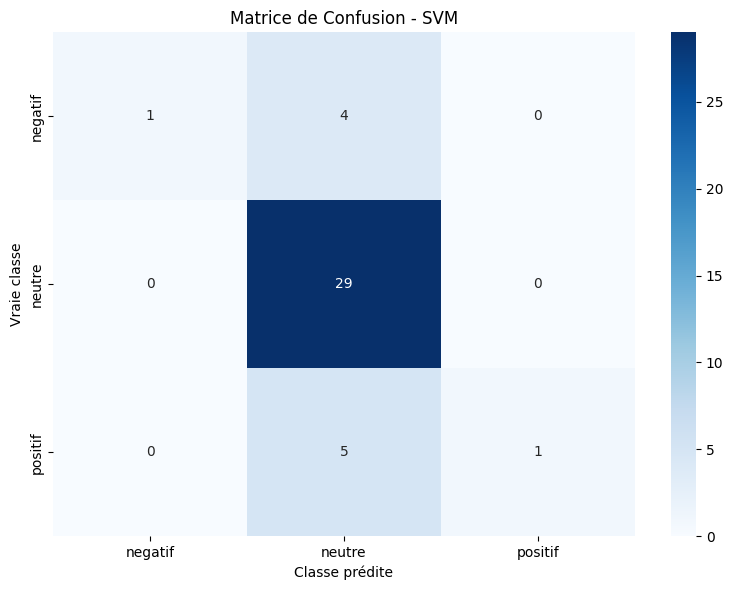

In [44]:
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title(f'Matrice de Confusion - {meilleur_modele}')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.tight_layout()
plt.savefig('matrice_confusion.png', dpi=300, bbox_inches='tight')
# plt.close()

print(f"\nMatrice de confusion sauvegardée: matrice_confusion.png")


Comparaison des modèles sauvegardée: comparaison_modeles.png


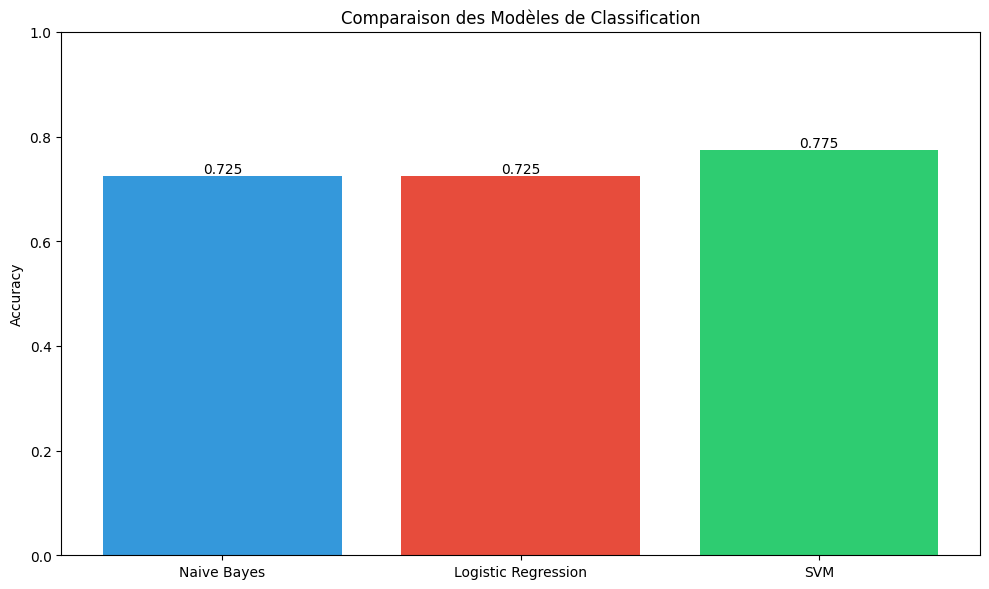

In [45]:
# Graphique de comparaison des modèles
plt.figure(figsize=(10, 6))
noms = list(resultats_models.keys())
accuracies = list(resultats_models.values())

bars = plt.bar(noms, accuracies, color=['#3498db', '#e74c3c', '#2ecc71'])
plt.ylabel('Accuracy')
plt.title('Comparaison des Modèles de Classification')
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.savefig('comparaison_modeles.png', dpi=300, bbox_inches='tight')
# plt.close()

print(f"\nComparaison des modèles sauvegardée: comparaison_modeles.png")

#### ==========================================
### ANALYSE DES SENTIMENTS SUR L'UVBF
#### ==========================================

In [46]:
# Statistiques globales
total_commentaires = len(df)
nb_positifs = (df['sentiment'] == 'positif').sum()
nb_negatifs = (df['sentiment'] == 'negatif').sum()
nb_neutres = (df['sentiment'] == 'neutre').sum()


In [47]:
pct_positifs = (nb_positifs / total_commentaires) * 100
pct_negatifs = (nb_negatifs / total_commentaires) * 100
pct_neutres = (nb_neutres / total_commentaires) * 100

In [48]:
print(f"\nRESULTATS FINAUX:")
print(f"   Total de commentaires analysés: {total_commentaires}")
print(f"\n   Commentaires POSITIFS: {nb_positifs} ({pct_positifs:.1f}%)")
print(f"   Commentaires NÉGATIFS: {nb_negatifs} ({pct_negatifs:.1f}%)")
print(f"   Commentaires NEUTRES: {nb_neutres} ({pct_neutres:.1f}%)")


RESULTATS FINAUX:
   Total de commentaires analysés: 196

   Commentaires POSITIFS: 27 (13.8%)
   Commentaires NÉGATIFS: 25 (12.8%)
   Commentaires NEUTRES: 144 (73.5%)


In [49]:
# Taux de satisfaction
taux_satisfaction = pct_positifs
taux_insatisfaction = pct_negatifs

In [50]:
print(f"\nINDICATEURS CLÉS:")
print(f"   Taux de satisfaction: {taux_satisfaction:.1f}%")
print(f"   Taux d'insatisfaction: {taux_insatisfaction:.1f}%")



INDICATEURS CLÉS:
   Taux de satisfaction: 13.8%
   Taux d'insatisfaction: 12.8%


In [51]:
# Conclusion
if taux_satisfaction > 50:
    conclusion = " Perception POSITIVE de l'UVBF sur les réseaux sociaux"
elif taux_insatisfaction > 50:
    conclusion = " Perception NÉGATIVE de l'UVBF sur les réseaux sociaux"
else:
    conclusion = "  Perception MIXTE de l'UVBF sur les réseaux sociaux"

print(f"\n{conclusion}")


  Perception MIXTE de l'UVBF sur les réseaux sociaux



Analyse des sentiments sauvegardée: analyse_sentiments_uvbf.png


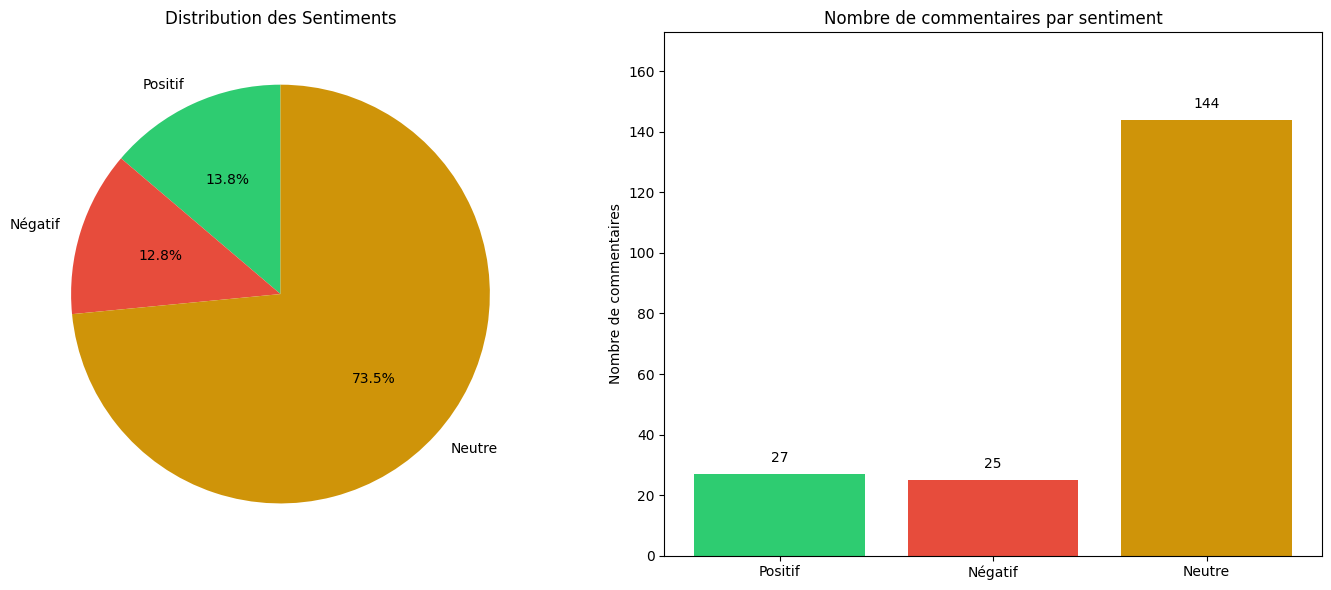

In [53]:
# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique en secteurs
colors = ['#2ecc71', '#e74c3c', "#cf9409"]
labels = ['Positif', 'Négatif', 'Neutre']
sizes = [nb_positifs, nb_negatifs, nb_neutres]

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Distribution des Sentiments')

# Graphique en barres
ax2.bar(labels, sizes, color=colors)
ax2.set_ylabel('Nombre de commentaires')
ax2.set_title('Nombre de commentaires par sentiment')
ax2.set_ylim(0, max(sizes) * 1.2)

for i, v in enumerate(sizes):
    ax2.text(i, v + max(sizes)*0.02, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('analyse_sentiments_uvbf.png', dpi=300, bbox_inches='tight')
# plt.close()

print(f"\nAnalyse des sentiments sauvegardée: analyse_sentiments_uvbf.png")


In [54]:
print("\nRésultats principaux:")
print(f"   • {total_commentaires} commentaires analysés")
print(f"   • {pct_positifs:.1f}% de sentiments positifs")
print(f"   • {pct_negatifs:.1f}% de sentiments négatifs")
print(f"   • Meilleur modèle: {meilleur_modele} ({resultats_models[meilleur_modele]*100:.1f}%)")
print(f"   • Conclusion: {conclusion}")


Résultats principaux:
   • 196 commentaires analysés
   • 13.8% de sentiments positifs
   • 12.8% de sentiments négatifs
   • Meilleur modèle: SVM (77.5%)
   • Conclusion:   Perception MIXTE de l'UVBF sur les réseaux sociaux
